### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 13

# Pre Lab

In [28]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

## Hands-On With Feature Engineering

### Imputation

In [2]:
# Example Dataset
data = {"Age": [25, None, 35, 29], "Salary": [50000, 54000, None, 58000]}
df = pd.DataFrame(data)
# Numerical Imputation with Mean
imputer = SimpleImputer(strategy="mean")
df["Age"] = imputer.fit_transform(df[["Age"]])
# Categorical Imputation (replace NaN with 'Unknown')
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
print(df)

         Age   Salary
0  25.000000  50000.0
1  29.666667  54000.0
2  35.000000  54000.0
3  29.000000  58000.0


### Encoding 

In [4]:
# Example Dataset
data = {"City": ["London", "Paris", "Berlin"]}
df = pd.DataFrame(data)
# One-Hot Encoding
one_hot = pd.get_dummies(df["City"])
# Label Encoding
le = LabelEncoder()
df["City_Label"] = le.fit_transform(df["City"])
print(one_hot)
print(df)

   Berlin  London  Paris
0   False    True  False
1   False   False   True
2    True   False  False
     City  City_Label
0  London           1
1   Paris           2
2  Berlin           0


### Feature Scaling 

In [6]:
# Example Dataset
data = {"Age": [25, 35, 29], "Salary": [50000, 54000, 58000]}
df = pd.DataFrame(data)
# Standardization
scaler = StandardScaler()
df[["Age", "Salary"]] = scaler.fit_transform(df[["Age", "Salary"]])
# Normalization
normalizer = MinMaxScaler()
df[["Age", "Salary"]] = normalizer.fit_transform(df[["Age", "Salary"]])
print(df)

   Age  Salary
0  0.0     0.0
1  1.0     0.5
2  0.4     1.0


### Creating Interaction Features 

In [7]:
# Example Dataset
data = {"Bedrooms": [3, 4, 2], "House_Size": [1000, 1200, 800]}
df = pd.DataFrame(data)
# Interaction Feature
df["Rooms_per_Square_Meter"] = df["Bedrooms"] / df["House_Size"]
print(df)

   Bedrooms  House_Size  Rooms_per_Square_Meter
0         3        1000                0.003000
1         4        1200                0.003333
2         2         800                0.002500


### Log Transformation 

In [10]:
# Example Dataset
data = {"Income": [1000, 10000, 50000, 100000]}
df = pd.DataFrame(data)
# Log Transformation
df["Log_Income"] = np.log1p(df["Income"])
print(df)

   Income  Log_Income
0    1000    6.908755
1   10000    9.210440
2   50000   10.819798
3  100000   11.512935


### Polynomial Features 

In [11]:
# Example Dataset
data = {"Feature": [2, 3, 4]}
df = pd.DataFrame(data)
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[["Feature"]])
print(polynomial_features)

[[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


### Binning 

In [12]:
# Example Dataset
data = {"Age": [25, 35, 29, 50, 60]}
df = pd.DataFrame(data)
# Binning
bins = [0, 30, 50, 100]
labels = ["Young", "Middle-Aged", "Senior"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)
print(df)

   Age    Age_Group
0   25        Young
1   35  Middle-Aged
2   29        Young
3   50  Middle-Aged
4   60       Senior


## Hands-On With Feature Selection

### Correlation Analysis

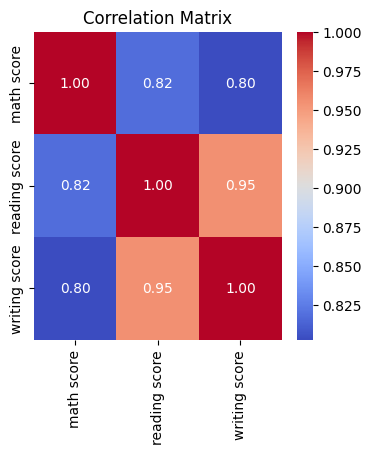

Highly correlated pairs (|correlation| > 0.85):
reading score - writing score: 0.95
writing score - reading score: 0.95


In [16]:
# Load dataset
data = pd.read_csv("data/student_perf/students_performance.csv")
# Filter numeric columns
numeric_data = data.select_dtypes(include=["number"])
# Compute correlation matrix
correlation_matrix = numeric_data.corr()
# Visualize the matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix") 
plt.show() 
# Drop features with high correlation (> 0.85) 
threshold = 0.85 
high_corr_pairs = [ 
(col1, col2) 
for col1 in correlation_matrix.columns 
for col2 in correlation_matrix.columns 
if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2 
] 
# Output the highly correlated pairs 
print("Highly correlated pairs (|correlation| > 0.85):") 
for col1, col2 in high_corr_pairs: 
    print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}") 

### Univariate Selection 

In [19]:
# Check column names 
print("Dataset columns:", data.columns) 
# Ensure 'passed_all' exists (modify this logic as per your requirement) 
if "passed_all" not in data.columns: 
# Example logic: Passed all exams if scores are >= 50 
    data["passed_all"] = (data["math score"] >= 50) & (data["reading score"] >= 50) & (data["writing score"] >= 50) 
# Encode categorical columns using one-hot encoding 
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Define features and target 
X = data_encoded.drop(columns=["passed_all"]) 
y = data_encoded["passed_all"] 
# Apply ANOVA F-test 
selector = SelectKBest(score_func=f_classif, k=5) 
X_selected = selector.fit_transform(X, y) 
# Display selected feature scores 
selected_features = X.columns[selector.get_support()] 
print("Selected Features:", list(selected_features))

Dataset columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Selected Features: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


### Recursive Feature Elimination (RFE) 

In [21]:
# Initialize model
model = RandomForestClassifier()
# Apply RFE
rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
X_rfe = rfe_selector.fit_transform(X, y)
# Get selected features
selected_rfe_features = X.columns[rfe_selector.support_]
print("RFE Selected Features:", list(selected_rfe_features))

RFE Selected Features: ['math score', 'reading score', 'writing score', 'gender_male', 'lunch_standard']


### Feature Importance from Tree-Based Models 

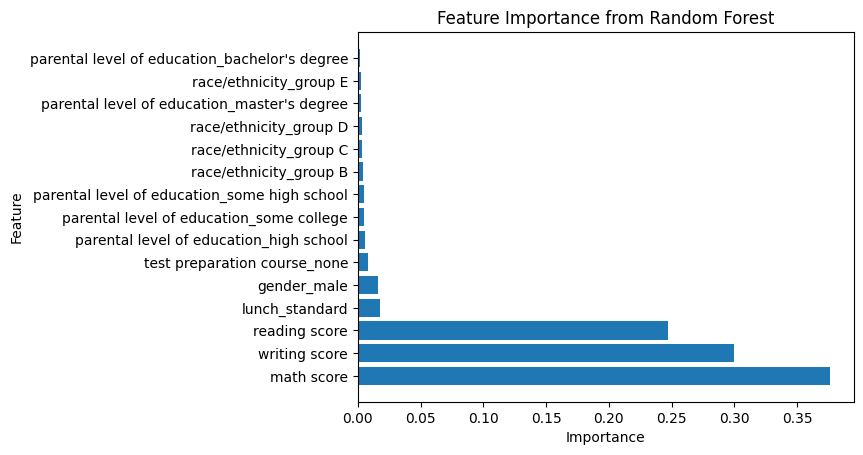

In [22]:
# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

### Regularization 

In [24]:
# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
# Select features with non-zero coefficients
lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X)
# Get selected features
selected_lasso_features = X.columns[lasso_selector.get_support()]
print("Lasso Selected Features:", list(selected_lasso_features))

Lasso Selected Features: ['math score', 'writing score']


c:\Users\Ahmed Mohiuddin Shah\AppData\Local\pypoetry\Cache\virtualenvs\machine_learning_labs-LThbZT-V-py3.10\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Visualizing Feature Importance 

### Bar Charts with Tree-Based Models 

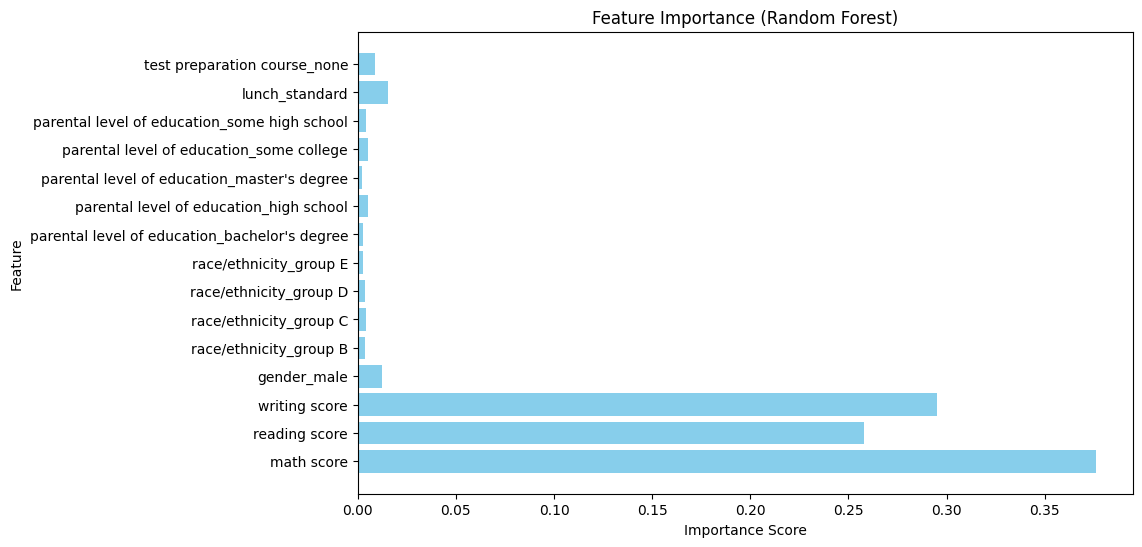

In [25]:
# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)
# Get feature importances
importances = model.feature_importances_
features = X.columns
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

### SHAP Summary Plot 

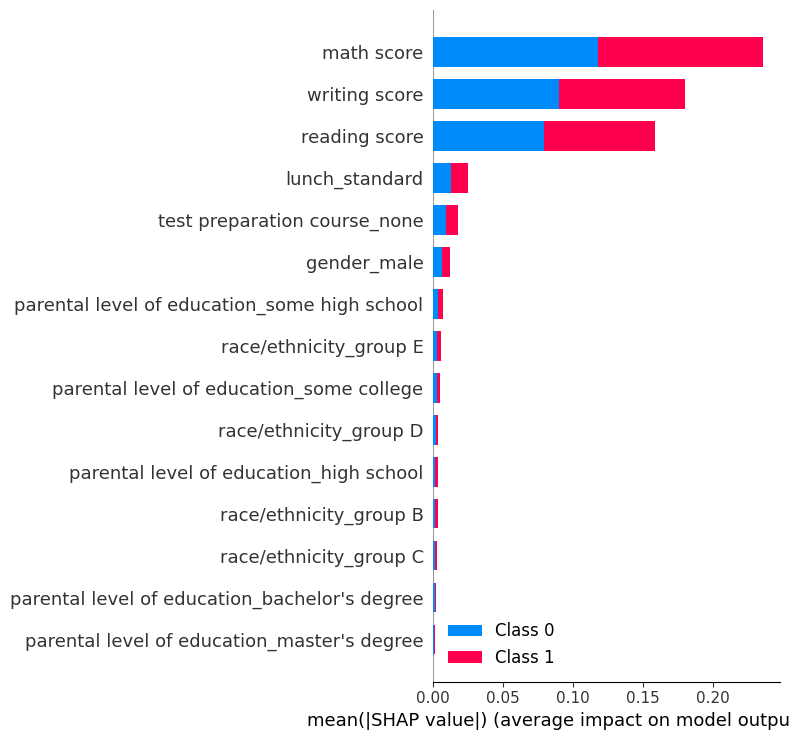

In [27]:
# Explain model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
# SHAP summary plot
shap.summary_plot(shap_values, X)

### Permutation Importance 

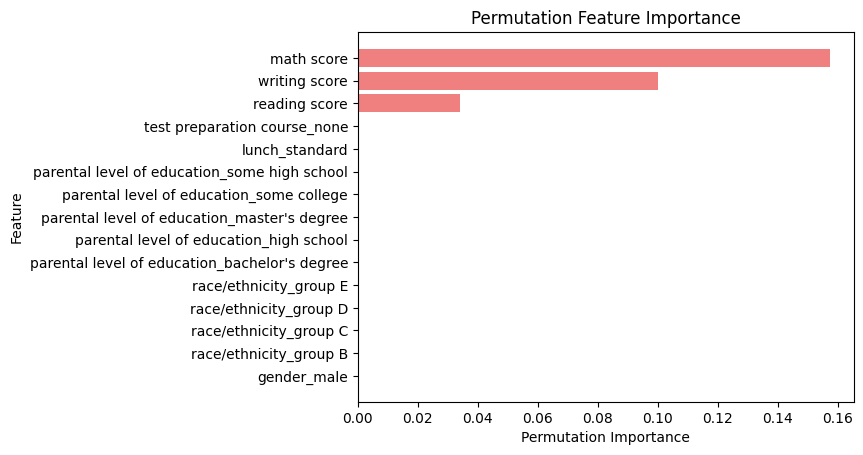

In [29]:
# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, scoring="accuracy")
# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(
    features[sorted_idx],
    perm_importance.importances_mean[sorted_idx],
    color="lightcoral",
)
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

# Mini Challenge

# Conclusion